In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.5

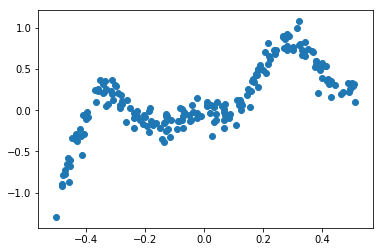

In [3]:
plt.scatter(x, y)

In [4]:
xx = np.linspace(min(x), max(x), num=200)

In [5]:
x_data = x.reshape(-1,1)
y_data = y.reshape(-1,1)
# xx_data = xx.reshape(-1,1)

In [9]:
import mylibrary.nnlib as tnn
colors = ['plum', 'darkviolet', 'purple', 'indigo']

In [99]:
hidden_size = 3
optimizer=tnn.Adam(learning_rate=0.01)

layer1a = tnn.NonLinearLayer(1, hidden_size, activation=tnn.Relu(), optimizer=optimizer)
layer2a = tnn.LinearLayer(hidden_size, 1, optimizer=optimizer)
net1 = tnn.AutoForm()
net1.collect_global_layers()

In [100]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

XX = x_data
YY = y_data

for step in range(10000):
    y1 = net1.forward(XX)
    loss = tnn.MseLoss.loss(y1, YY)
    dy = tnn.MseLoss.del_loss(y1, YY)
    
    dx = net1.backward(dy)
    
    net1.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, y1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.scatter(x, dy.reshape(-1), marker='.', c='c', lw=1, label='x,dx')
        plt.plot(x, np.zeros_like(x), c='b', lw=1)

        for i, out in enumerate(net1.layerList[0].output.T):
            plt.scatter(x, out, marker='.', c=colors[i], lw=1)
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.10977075770489163


_______________________
epoch 10
Loss 0.07282868699882725


_______________________
epoch 20
Loss 0.05618173197709655


_______________________
epoch 30
Loss 0.04696618363808988


_______________________
epoch 40
Loss 0.04160353325124194


_______________________
epoch 50
Loss 0.038551745207719416


_______________________
epoch 60
Loss 0.03709662939541184


_______________________
epoch 70
Loss 0.03638416858929412


_______________________
epoch 80
Loss 0.03603844180054159


_______________________
epoch 90
Loss 0.035805274149185044


_______________________
epoch 100
Loss 0.035601565496697365


_______________________
epoch 110
Loss 0.03541202972200962


_______________________
epoch 120
Loss 0.03524152741881836


_______________________
epoch 130
Loss 0.035064519017549374


_______________________
epoch 140
Loss 0.034883859866873236


_______________________
epoch 150
Loss 0.034703192993424836


_______________________
epoch

TclError: this isn't a Tk application

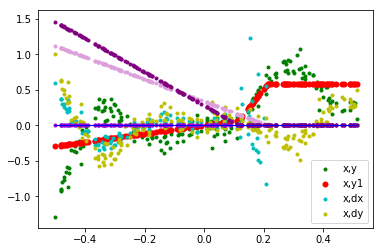

In [101]:
%matplotlib inline

plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, y1.reshape(-1), marker='.', c='r', lw=3, label='x,y1')
plt.scatter(x, dx.reshape(-1), marker='.', c='c', lw=1, label='x,dx')
plt.plot(x, np.zeros_like(x), c='b', lw=1)
plt.scatter(x, dy.reshape(-1), marker='.', c='y', lw=1, label='x,dy')

for i, out in enumerate(net1.layerList[0].output.T):
    plt.scatter(x, out, marker='.', c=colors[i], lw=1)
plt.legend()

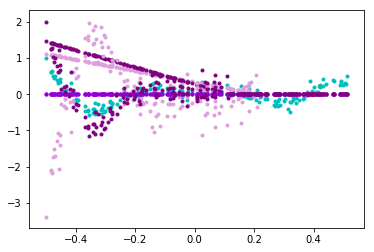

In [102]:
plt.scatter(x, dy.reshape(-1), marker='.', c='c', lw=1, label='x,dy')
# plt.scatter(x, y1.reshape(-1), marker='.', c='r', lw=1, label='x,dy')
for i, out in enumerate(net1.layerList[0].output.T):
    plt.scatter(x, out, marker='.', c=colors[i], lw=1)
for i, out in enumerate(net1.layerList[0].del_zee.T):
    plt.scatter(x, out, marker='.', c=colors[i], lw=1)

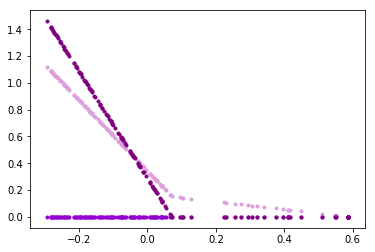

In [103]:
# plt.scatter(y1.reshape(-1), dy.reshape(-1), marker='.', c='g', label='y1,dy')
for i, out in enumerate(net1.layerList[0].output.T):
    plt.scatter(y1.reshape(-1), out, marker='.', c=colors[i], lw=1)

In [104]:
input_size = 3
hidden_size = 4
layer1b = tnn.NonLinearLayer(input_size, hidden_size, activation=tnn.Relu(), optimizer=optimizer)
layer2b = tnn.LinearLayer(hidden_size, 1, optimizer=optimizer)
net2 = tnn.AutoForm()
net2.collect_global_layers()

In [105]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

XX = net1.layerList[0].output
YY = dy

for step in range(10000):
    a1a = net2.forward(XX)
    loss = tnn.MseLoss.loss(a1a, YY)
    dya = tnn.MseLoss.del_loss(a1a, YY)
    
    dxa = net2.backward(dya)
    
    net2.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, YY.reshape(-1), marker='.', c='g', label='x,dy')
        plt.scatter(x, a1a.reshape(-1), marker='.', c='r', lw=3, label='x,a1a')
        plt.scatter(x, dya.reshape(-1), marker='.', c='c', lw=1, label='x,dxa')
        plt.plot(x, np.zeros_like(x), c='b', lw=1)
#         plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1, label='x,da1')
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.03775342663523974


_______________________
epoch 10
Loss 0.03191572854765199


_______________________
epoch 20
Loss 0.031104263287667955


_______________________
epoch 30
Loss 0.030973290632369553


_______________________
epoch 40
Loss 0.030927738923725107


_______________________
epoch 50
Loss 0.030823255515504768


_______________________
epoch 60
Loss 0.030658762692075427


_______________________
epoch 70
Loss 0.030434863284495996


_______________________
epoch 80
Loss 0.030125968665024972


_______________________
epoch 90
Loss 0.029708690116522316


_______________________
epoch 100
Loss 0.02916693190335645


_______________________
epoch 110
Loss 0.028515036501930196


_______________________
epoch 120
Loss 0.027769149521328237


_______________________
epoch 130
Loss 0.026946717206556864


_______________________
epoch 140
Loss 0.026127466875225505


_______________________
epoch 150
Loss 0.025394231248046496


______________________

TclError: this isn't a Tk application

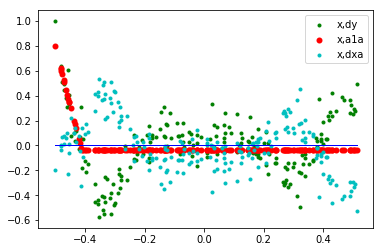

In [106]:
%matplotlib inline

plt.scatter(x, YY.reshape(-1), marker='.', c='g', label='x,dy')
plt.scatter(x, a1a.reshape(-1), marker='.', c='r', lw=3, label='x,a1a')
plt.scatter(x, dya.reshape(-1), marker='.', c='c', lw=1, label='x,dxa')
plt.plot(x, np.zeros_like(x), c='b', lw=1)
plt.legend()

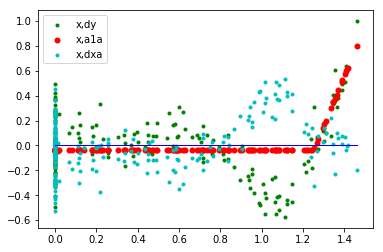

In [110]:
i=2
plt.scatter(XX[:,i].reshape(-1), YY.reshape(-1), marker='.', c='g', label='x,dy')
plt.scatter(XX[:,i].reshape(-1), a1a.reshape(-1), marker='.', c='r', lw=3, label='x,a1a')
plt.scatter(XX[:,i].reshape(-1), dya.reshape(-1), marker='.', c='c', lw=1, label='x,dxa')
plt.plot(XX[:,i].reshape(-1), np.zeros_like(XX[:,i].reshape(-1)), c='b', lw=1)
plt.legend()

In [111]:
## combining them together

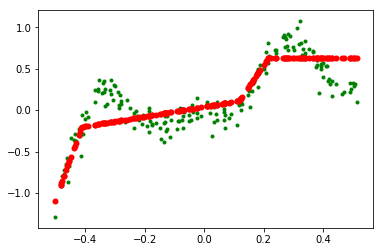

In [112]:
a1 = net1.forward(x_data)
a2 = net2.forward(net1.layerList[0].output)
yout = a1 - a2

plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, yout.reshape(-1), marker='.', c='r', lw=3, label='x,yout')